In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as stat_api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
bike_data = pd.read_csv('day.csv', sep=',')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Pre processing data
# Dropping holiday column as it is highly correlated to‘workingday’ column
bike_data.drop('holiday',axis=1,inplace=True) 
# Dropping atemp column as it is highly correlated to ‘temp’ column
bike_data = bike_data.drop('atemp',axis=1) 

In [6]:
bike_data.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [7]:
# converting season and weather column categorical column
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
bike_data.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,6,0,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,1,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,2,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,3,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


### Visualizing the data 
Analyzing the data using visual techniques

#### Checking Numerical data by visualizing in pair-plot

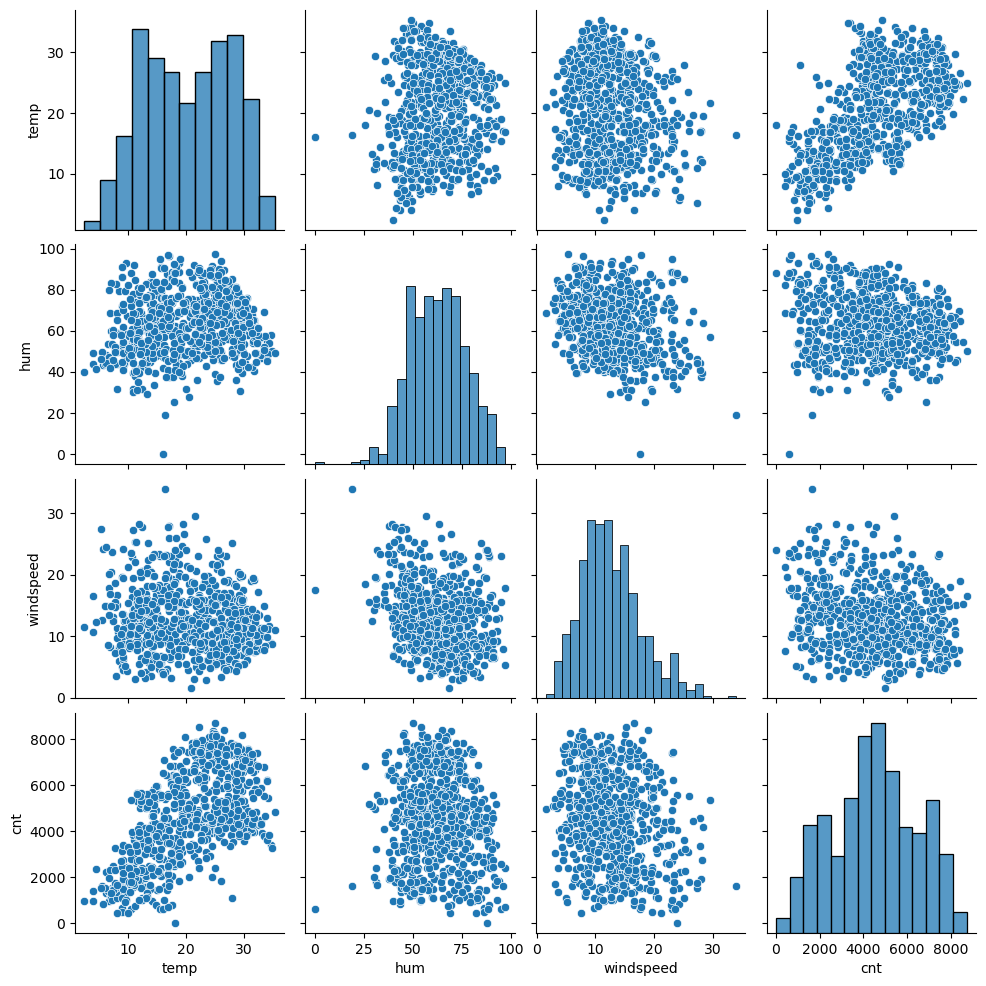

In [8]:
sns.pairplot(bike_data[['temp','hum','windspeed','cnt']])
plot.show()

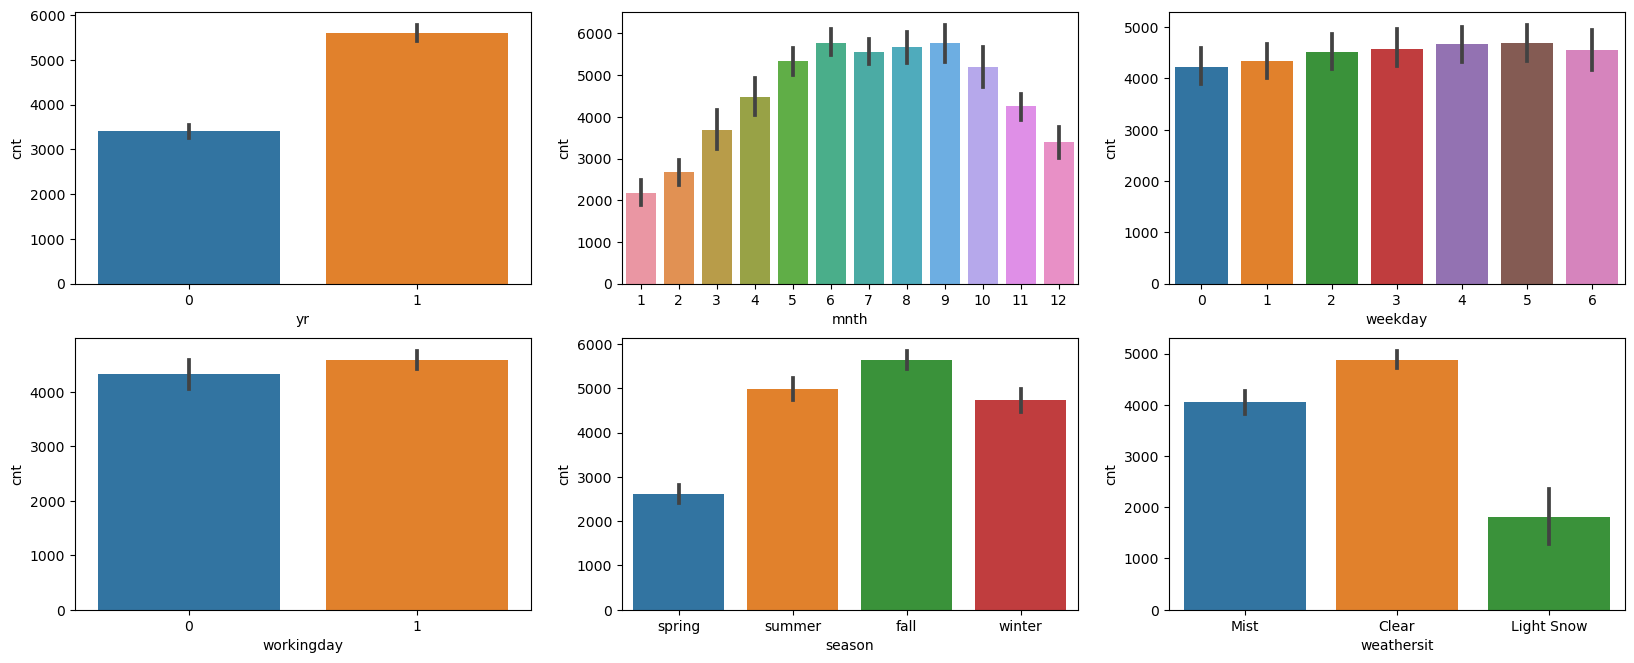

In [9]:
plot.figure(figsize=(20,12))
plot.subplot(3,3,1)
sns.barplot(data=bike_data, x='yr', y='cnt')
plot.subplot(3,3,2)
sns.barplot(data=bike_data, x='mnth', y='cnt')
plot.subplot(3,3,3)
sns.barplot(data=bike_data, x='weekday', y='cnt')
plot.subplot(3,3,4)
sns.barplot(data=bike_data, x='workingday', y='cnt')
plot.subplot(3,3,5)
sns.barplot(data=bike_data, x='season', y='cnt')
plot.subplot(3,3,6)
sns.barplot(data=bike_data, x='weathersit', y='cnt')
plot.show()

#### From the above result we can say following;
1. We can see that comparing to the previous year the number of users has increased
2. Over the period of time in months, the number of users has increased and gradually it has decreased
3. During weekdays we can see more usage of bikes by the users
4. Also, the same is represented by comparing with workingday, the users are more in working day.
5. The most bikes are also used during summer and fall season
6. During Clear and Mist weather number of users are also more.

### Regression plot of the other columns with respect to 'Cnt'

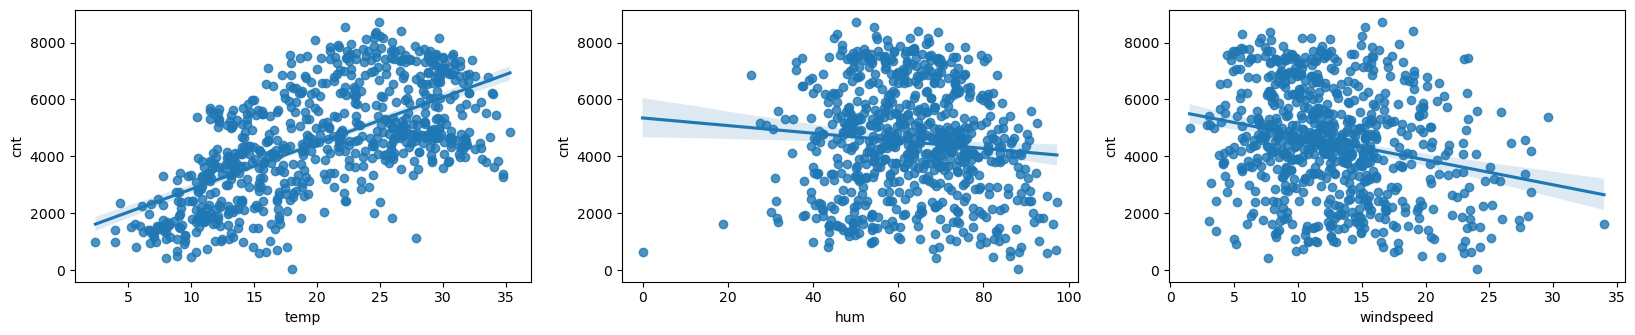

In [10]:
plot.figure(figsize = (20, 12))
plot.subplot(3,3,1)
sns.regplot(x='temp', y='cnt', data=bike_data)
plot.subplot(3,3,2)
sns.regplot(x='hum', y='cnt', data=bike_data)
plot.subplot(3,3,3)
sns.regplot(x='windspeed', y='cnt', data=bike_data)
plot.show()

#### From the above result we can say following;
1. When the temperature increases the number of users increases
2. When humidity increases the number of users decreases
3. Also, the number of user decreases when windspeed increase.

#### The variable `season` has four levels. We need to convert these levels into integer as well.
#### - For this, we can use the function [`pd.get_dummies()`]

In [11]:
# converting to binary data by get_dummies method
bike_data = pd.get_dummies(bike_data,columns=['season'],drop_first=True) 
bike_data.head() 

,instant,dteday,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter
0,1,01-01-2018,0,1,6,0,Mist,14.110847,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,1,0,0,Mist,14.902598,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,1,1,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,1,2,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,1,3,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,1,0,0


#### The same `pd.get_dummies()` method can be applied to ``weathersit`` column, which to has four levels.

In [12]:
bike_data = pd.get_dummies(bike_data,columns=['weathersit'],drop_first=True)
bike_data.head()

,instant,dteday,yr,mnth,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,1,01-01-2018,0,1,6,0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,2,1,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,3,1,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,0


##### Dropping unnecessary columns dteday and instant. As, year and month already exists and instant is index number column

In [13]:
bike_data = bike_data.drop('dteday', axis=1)
bike_data = bike_data.drop('instant', axis=1)
bike_data = bike_data.drop('casual', axis=1)
bike_data = bike_data.drop('registered', axis=1)
bike_data.head()

,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,0,1,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


#### Let's split the data in train and test

In [14]:
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 13)
(219, 13)


#### Let's use MinMaxScaler method to normalize the scale of the data

In [15]:
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [16]:
bike_data_train.describe()

,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,2.990196,0.676471,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,3.468714,2.017093,0.468282,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,3.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,5.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Let's see the linearity between variables by plotting correlation 

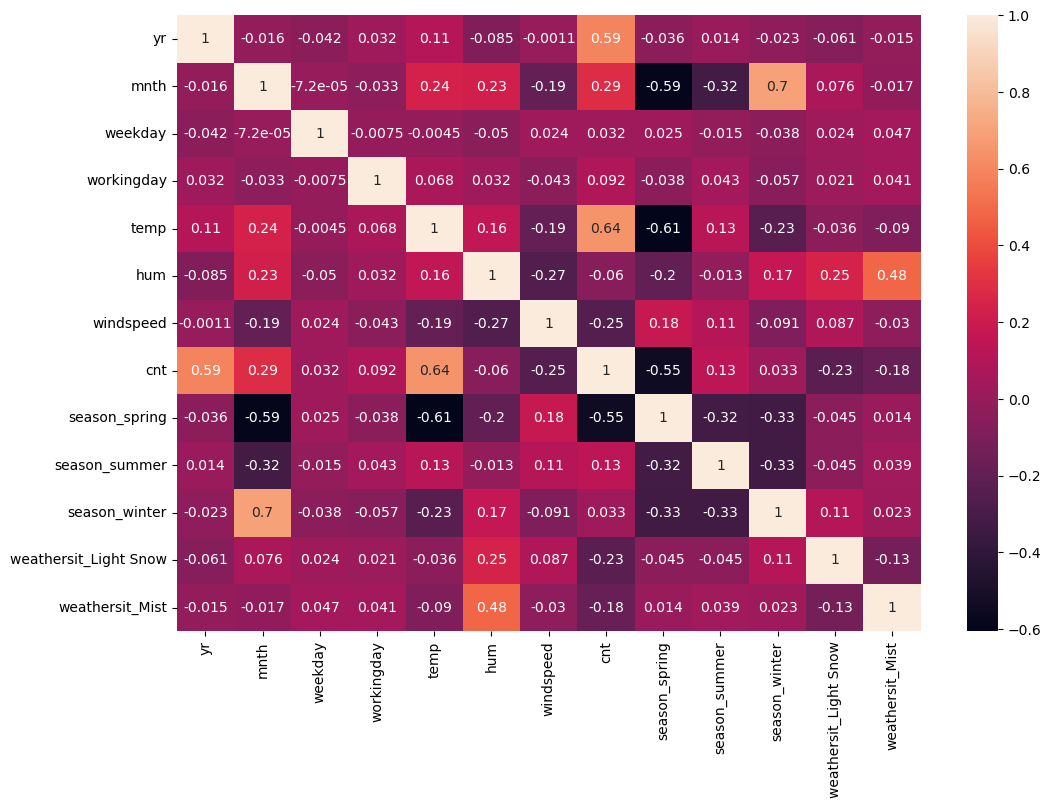

In [17]:
plot.figure(figsize=(12,8))
sns.heatmap(bike_data_train.corr(), annot=True)
plot.show()

## Building Model

In [18]:
y_train = bike_data_train.pop('cnt')
x_train = bike_data_train

In [19]:
print(y_train.shape)
print(x_train.shape)

(510,)
(510, 12)


### Using LinearRegression and RFE to eliminate feature
Approach
- A mixed approach is followed.
- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.

In [20]:
# Selecting 15 Features using RFE 
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,n_features_to_select=13, step=1)
rfe = rfe.fit(x_train, y_train)

In [21]:
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : x_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
1,1,True,mnth
2,1,True,weekday
3,1,True,workingday
4,1,True,temp
5,1,True,hum
6,1,True,windspeed
7,1,True,season_spring
8,1,True,season_summer
9,1,True,season_winter


#### RFE Feature Ranking

In [22]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist'], dtype=object)

In [23]:
x_train_rfe = x_train[selected_features]

### Building model using statsmodel, for the detailed statistics

- Following a stepwise elimination

#### Model 1
- Using features selected by RFE 

In [24]:
x_train_rfe = stat_api.add_constant(x_train_rfe)
lm = stat_api.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.51e-183
Time:                        18:46:08   Log-Likelihood:                -4132.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2048.38

### Calculate the VIFs for the model. Created a method which can be reused whenever required while creating new model.

In [25]:
def show_vif(x_train_df):
    vif = pd.DataFrame()
    X = x_train_df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Created a method for creating statsmodel for detailed summary

#### Model 2
- Removing `mnth` because of high p-value

In [26]:
def stat_linreg_summary(x_data, col_name):
    x_data = x_data.drop([col_name], axis = 1)
    X_train_lm = stat_api.add_constant(x_data)
    lm = stat_api.OLS(y_train,X_train_lm).fit() 
    print(lm.summary())
    return x_data, lm, X_train_lm

# Removing mnth because of high p-value
X_train_new, lm, x_train_rfe = stat_linreg_summary(x_train_rfe, 'mnth')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.07e-184
Time:                        18:46:08   Log-Likelihood:                -4132.9
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     498   BIC:                             8341.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2099.62

In [27]:
show_vif(X_train_new)

                 Features    VIF
0                   const  78.98
7           season_spring   4.54
4                    temp   3.50
9           season_winter   3.10
8           season_summer   2.06
5                     hum   1.89
11        weathersit_Mist   1.58
10  weathersit_Light Snow   1.25
6               windspeed   1.20
1                      yr   1.04
2                 weekday   1.02
3              workingday   1.01


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

## Residual Analysis of the train data
#### Now to check if the error terms are also normally distributed

In [28]:
y_train_cnt = lm.predict(X_train_new)

/Users/abrarlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


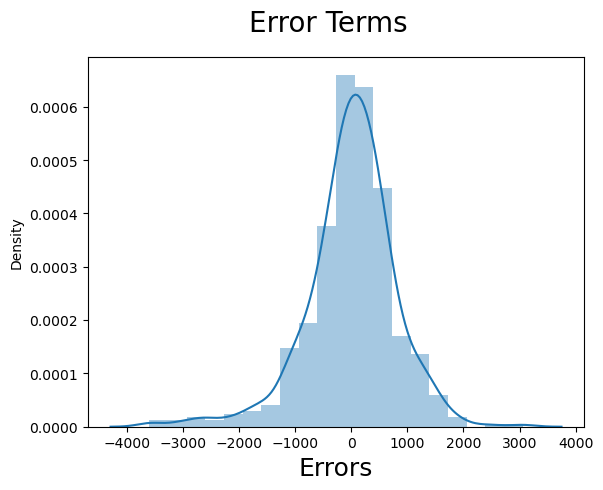

In [29]:
fig = plot.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plot.xlabel('Errors', fontsize = 18)   
plot.show()  

## Making Predictions
#### Applying the scaling on the test sets

In [30]:
num_vars = ['temp','hum','windspeed']
bike_data_test[num_vars] = scaler.fit_transform(bike_data_test[num_vars])

In [31]:
bike_data_test.describe()

,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,3.018265,0.698630,0.546312,0.508750,0.418870,4546.981735,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,3.421875,1.988415,0.459904,0.249189,0.201253,0.188111,1898.633630,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,0.328479,0.358469,0.283817,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,3.000000,1.000000,0.546045,0.494200,0.402533,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,5.000000,1.000000,0.759735,0.651165,0.524362,5869.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [32]:
y_test = bike_data_test.pop('cnt')
x_test = bike_data_test
print(y_test.shape)
print(x_test.shape)

(219,)
(219, 12)


In [33]:
x_test.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [34]:
lm.tvalues

const                     6.589687
yr                       27.648005
weekday                   4.164063
workingday                2.657204
temp                     14.445624
hum                      -3.177017
windspeed                -6.790116
season_spring            -3.658416
season_summer             3.204321
season_winter             5.333709
weathersit_Light Snow    -9.080491
weathersit_Mist          -5.313834
dtype: float64

In [35]:
x_test_m4 = stat_api.add_constant(x_test)
x_test_m4 = x_test_m4[['const', 'yr', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist']]
y_pred_m4 = lm.predict(x_test_m4)

## Model Evaluation

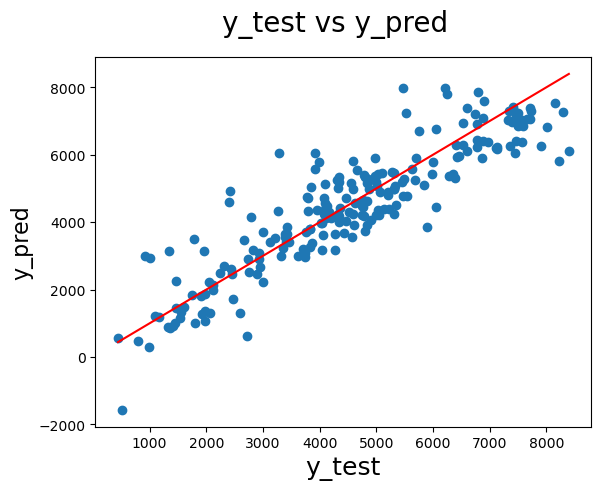

In [36]:
fig = plot.figure()
plot.scatter(y_test, y_pred_m4)
plot.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line plot
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plot.xlabel('y_test', fontsize = 18)                          
plot.ylabel('y_pred', fontsize = 16)     
plot.show() 

## Evaluating the model's performance by mean_squared_error and r2_score

In [37]:
print('MSE : ', mean_squared_error(y_true=y_test, y_pred=y_pred_m4))

MSE :  726783.5557890768


In [38]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_cnt)
print("r2 train score: ", r2_train)

r2_test = r2_score(y_true=y_test, y_pred=y_pred_m4)
print("r2 test score: ", r2_test)

r2 train score:  0.8316909747259862
r2 test score:  0.7974602006399879


### Model Stability¶

#### Cross-validation, calculates R-squared scores, scales the features, fits the linear regression model, and displays the coefficients and intercept.

In [39]:
# R-square using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,x_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.74428494, 0.81318852, 0.8590463 , 0.82404801, 0.77113466,
       0.80748466, 0.73862391, 0.90743525, 0.85641682, 0.83793836])

- cross_val_score is used to perform 10-fold cross-validation on the training data (x_train[selected_features] and y_train). The scoring parameter is set to 'r2' to calculate the R-squared score for each fold.

In [40]:

print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.10)


- The mean and standard deviation of the R-squared scores across the 10 folds are calculated using clr.mean() and clr.std(), respectively.

In [41]:
selected_features

array(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist'], dtype=object)

In [42]:
from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = x_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2048.38983364]


,MLR Coefficients
temp,4291.365491
yr,2018.785792
season_winter,752.804307
season_summer,408.086973
workingday,205.971109
weekday,74.357114
mnth,8.202573
weathersit_Mist,-501.566187
season_spring,-615.423966
hum,-1086.831794


- StandardScaler is used to standardize the selected features (temp, windspeed, and hum) in the training data (x_train[selected_features]). The scaled data is stored in std_X_train.
- The standardized features (std_X_train) and the target variable (reshaped_y_train) are used to fit the linear regression model (std_model = lr.fit(std_X_train, reshaped_y_train)).
- The coefficients of the linear regression model are extracted and sorted in descending order, along with the intercept.

#### We can see that the equation of our best fitted line is:

$ cnt = 2048.389 + 4291.365 \times  temp + 2018.785  \times  yr + 752.804 \times seasonwinter + 408.086 \times seasonsummer + 205.971 \times workingday + 74.357 \times weekday + 8.202 \times mnth - 501.566 \times weathersitMist - 615.423 \times seasonspring - 1086.831 \times hum - 1571.287 \times windspeed - 2145.511 \times weathersitLight Snow $